# PhD Student Mental Health Project

## Overview

This notebook contains analysis of survey data conducted by Shift Learning on PhD students. The project uses multiple machine learning models such as logistic regression, decision trees and naive bayes to draw insights into what risk factors contribute to mental health problems in PhD students and make recommendations on how to improve. 

## Business Problem

PhD students are at high risk of mental health issues and have a high suicide rate. This project aims to help academia understand the risk factors in order to systematically improve student’s overall mental health. This project also makes recommendations on how to set up preventative measures for mental health issues among students.

#### End Users:
- Universities, research facilities, school mental health counselors

#### True Business Problem:

- Understand risk factors that contributes to PhD students needing help for anxiety and depression.
- create a model that helps to identify students who might need help

#### Context:
- False positive: predict that a student need help for anxiety/depression when they don't 
    - Outcome: trouble and disturbance to the student
- False negative: predict that a student doesn't need help for anxiety/depression when they actually do
    - Outcome: student not getting the help that they need

#### Model Evaluation

We will be focusing on recall because we want to minimize false negative. 

## Data Understanding

The data is aggregated by surveying and interviewing 6,320 current PhD students all over the world in 2019. There are around 60 questions about their personal information and their opinions and concerns about their PhD program.
Important questions include age, country of origin, country of study, whether/by whom they were bullied, whether/reason they need to work outside of their program, whether/which kind of discrimination the student faced, their career expectations, worries about the program/their future, etc.

We are modeling on the assumption that if students need help with anxiety and/or depression, they would ask for it. 

### EDA

In [42]:
# basic imports
import pandas as pd
import numpy as np

In [43]:
# load dataframe
df=pd.read_csv('data.csv',dtype='str')

In [44]:
# check the dataframe
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


The first row is the questions.

In [45]:
# check the size of the dataset
df.shape

(6813, 274)

The dataset has 6812 data points and 274 columns. 

In [46]:
# check column names
list(df.columns)

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1',
 'Q1.a',
 'Q2',
 'Q3',
 'Q3.a',
 'Q4',
 'Q5',
 'Q6',
 'Q6.a',
 'Q7',
 'Q7.a',
 'Q8',
 'Q8.a',
 'Q9',
 'Q9.a',
 'Q10',
 'Q10.a',
 'Q11',
 'Q11.a',
 'Q12:1',
 'Q12:2',
 'Q12:3',
 'Q12:4',
 'Q12:5',
 'Q12:6',
 'Q12:7',
 'Q12:8',
 'Q12:9',
 'Q12:10',
 'Q12:11',
 'Q12.a',
 'Q13',
 'Q14',
 'Q14.a',
 'Q15.a',
 'Q15.b',
 'Q15.c',
 'Q15.d',
 'Q15.e',
 'Q15.f',
 'Q15.g',
 'Q15.h',
 'Q15.i',
 'Q15.j',
 'Q15.k',
 'Q15.l',
 'Q15.m',
 'Q15.n',
 'Q16',
 'Q17',
 'Q17.a',
 'Q18.a',
 'Q19.a',
 'Q20',
 'Q21.a',
 'Q21.b',
 'Q21.c',
 'Q21.d',
 'Q21.e',
 'Q21.f',
 'Q21.g',
 'Q21.h',
 'Q21.i',
 'Q22.a',
 'Q22.b',
 'Q22.c',
 'Q22.d',
 'Q22.e',
 'Q22.f',
 'Q22.g',
 'Q22.h',
 'Q22.i',
 'Q23',
 'Q24',
 'Q25',
 'Q25.a',
 'Q26',
 'Q27.a',
 'Q27.b',
 'Q27.c',
 'Q27.d',
 'Q27.e',
 'Q27.f',
 'Q28',
 'Q29',
 'Q29.a',
 'Q30.a',
 'Q30.b',
 'Q30.c',
 'Q30.d',
 'Q30.e',
 'Q30.f',
 'Q31',
 'Q32:1

Questions start from the 10th column.

In [47]:
# print out a list of the questions
question_list=list(df.columns)[9:]
for q in question_list:
    print('********')
    print(q)
    print(df[q][0])

********
Q1
Which, if any, of the following degrees are you currently studying for?
********
Q1.a
If other, please specify
********
Q2
Hidden
********
Q3
Which was the most important reason you decided to enrol in a PhD programme?
********
Q3.a
If other, please specify
********
Q4
Are you studying in the country you grew up in?   
********
Q5
Where do you currently live?
********
Q6
Which region in Asia?
********
Q6.a
If other, please specify
********
Q7
Which country in Australasia?
********
Q7.a
If other, please specify
********
Q8
Which country in Africa?
********
Q8.a
If other, please specify
********
Q9
Which country in Europe?
********
Q9.a
If other, please specify
********
Q10
Which country in North or Central America?
********
Q10.a
If other, please specify
********
Q11
Which country in South America?
********
Q11.a
If other, please specify
********
Q12:1
What prompted you to study outside your country of upbringing? 
********
Q12:2
What prompted you to study outside your count

#### Target

Our target column is Q28

In [48]:
# check values for target
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [49]:
df['Q28'].value_counts(normalize=True)

No                                                                          0.600000
Yes                                                                         0.356943
Prefer not to say                                                           0.042910
Have you ever sought help for anxiety or depression caused by PhD study?    0.000147
Name: Q28, dtype: float64

There are 4083 Nos and 2429 Yeses. There's a little bit of class imbalance, but not too bad.

In [50]:
# check null values
df['Q28'].isna().sum()

8

There are not many "prefer not to say"s or null values, so we can safely drop them.

In [51]:
df=df.dropna(subset=['Q28'])
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


In [52]:
# check if those rows are sucessfully dropped
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [53]:
# drop "Prefer not to say"s
df=df[df['Q28']!='Prefer not to say']

In [54]:
# check if those rows are sucessfully dropped 
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [55]:
dict_target={'Yes': 1, 'No': 0}

In [56]:
df['Q28']=df['Q28'].map(dict_target)

<ipython-input-56-7a5e2d789d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q28']=df['Q28'].map(dict_target)


#### Features

There are two parts to this problem:
- indicative modeling:
    - figure out the risk factors for mental health issues in PhD students
- predictive modeling:
    - a model that can be put into use 

For these two approaches we need different data cleaning methods.

### Baseline Understanding

In [109]:
df['Q28'][1:].value_counts(normalize=True)

0.0    0.626996
1.0    0.373004
Name: Q28, dtype: float64

If we predict the majority class of not going to need help for anxiety/depression as a result of PhD study (assuming that if people need help, they ask for help), we will be right 62.7% of the time.

### Indicative Modeling 

For this method, I'm going to pick out features that I think might be most relevant to mental health based on common sense and clean them up individually.

In [57]:
# define a function to print out information of a column
def info(label):
    '''
    input string of column name
    output comprehensive analysis of the column
    '''
    print(f'column name: {label}')
    print('     ')
    print(f'Question: {df[label][0]}')
    print('     ')
    print(f'number of null values: {df[label].isna().sum()}')
    print('     ')
    print('Value Count:')
    
    print(df[label].value_counts())

In [60]:
# create a new list for all the columns that we'll be using for indicative modeling
ind_col=[]

In [61]:
# create a new dd for indicative modeling
ind_df=df

**Q1**

In [58]:
info('Q1')

column name: Q1
     
Question: Which, if any, of the following degrees are you currently studying for?
     
number of null values: 0
     
Value Count:
Doctorate degree (PhD/DPhil/MD)                                            6294
Dual doctorate degree (MD-PhD, PhD-PhD or other combination)                218
Which, if any, of the following degrees are you currently studying for?       1
Name: Q1, dtype: int64


In [59]:
# create dictionary for converting values into numbers
dict_Q1={'Doctorate degree (PhD/DPhil/MD)': 0, 
         'Dual doctorate degree (MD-PhD, PhD-PhD or other combination)': 1, 
         'Which, if any, of the following degrees are you currently studying for?':'dual_degree'}

In [62]:
# change values in column Q1
ind_df['Q1']=ind_df['Q1'].map(dict_Q1)

<ipython-input-62-dce7828f738f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['Q1']=ind_df['Q1'].map(dict_Q1)


In [63]:
# add processed column to list
ind_col.append('Q1')

The previous two steps are going to be repeated throughout the indicative modeling cleaning process so I'll write a function for it.

In [65]:
# function for cleaning and adding the column to list
def process(column_name,dictionary):
    ind_df[column_name]=ind_df[column_name].map(dictionary)
    ind_col.append(column_name)

**Q4**

In [66]:
info('Q4')

column name: Q4
     
Question: Are you studying in the country you grew up in?   
     
number of null values: 0
     
Value Count:
Yes                                                   4153
 No                                                   2359
Are you studying in the country you grew up in?          1
Name: Q4, dtype: int64


In [67]:
dict_Q4={'Yes':1, ' No':0, 'Are you studying in the country you grew up in? \xa0 ': 'home country'}

In [68]:
process('Q4',dict_Q4)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q13**

In [72]:
info('Q13')

column name: Q13
     
Question: Do you have a job alongside your studies?
     
number of null values: 0
     
Value Count:
No                                           5249
Yes                                          1263
Do you have a job alongside your studies?       1
Name: Q13, dtype: int64


In [71]:
ind_df['Q4'].value_counts()

1               4153
0               2359
home country       1
Name: Q4, dtype: int64

In [73]:
dict_Q13={'Yes ':1, 'No':0, 'Do you have a job alongside your studies?': 'job'}

In [74]:
process('Q13',dict_Q13)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q31**

In [75]:
info('Q31')

column name: Q31
     
Question: Do you feel that you have experienced bullying in your PhD program?
     
number of null values: 7
     
Value Count:
No                                                                     4902
Yes                                                                    1388
Prefer not to say                                                       215
Do you feel that you have experienced bullying in your PhD program?       1
Name: Q31, dtype: int64


In [76]:
dict_Q31={'Yes':1, 'No': 0, 'Prefer not to say': 2, 'Do you feel that you have experienced bullying in your PhD program?': 'bullying'}

In [77]:
process('Q31',dict_Q31)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q34**

In [79]:
info('Q34')

column name: Q34
     
Question: Do you feel that you have experienced discrimination or harassment in your PhD program?
     
number of null values: 24
     
Value Count:
No                                                                                         4937
Yes                                                                                        1334
Prefer not to say                                                                           217
Do you feel that you have experienced discrimination or harassment in your PhD program?       1
Name: Q34, dtype: int64


In [80]:
dict_Q34={'Yes':1, 'No': 0, 'Prefer not to say': 2, 'Do you feel that you have experienced discrimination or harassment in your PhD program?': 'discrimination/harrassment'}

In [81]:
process('Q34',dict_Q34)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q19.a**

In [82]:
info('Q19.a')

column name: Q19.a
     
Question: How satisfied are you with your PhD experience?
     
number of null values: 0
     
Value Count:
6                                                  2085
5                                                  1908
4 = Neither satisfied nor dissatisfied              717
3                                                   659
7 = Extremely satisfied                             592
2                                                   360
1 = Not at all satisfied                            191
How satisfied are you with your PhD experience?       1
Name: Q19.a, dtype: int64


Satisfaction is on a scale of 1 to 7, not at all satisfied to extremely satisfied. So the values just need to be reduced to numbers. 

In [83]:
ind_df['Q19.a'][1:]=ind_df['Q19.a'][1:].map(lambda x:int(x[0]))

<ipython-input-83-104b8e6e7b4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['Q19.a'][1:]=ind_df['Q19.a'][1:].map(lambda x:int(x[0]))
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:1043: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

**Q24**

In [84]:
info('Q24')

column name: Q24
     
Question: On average, how many hours a week do you typically spend on your PhD programme?
     
number of null values: 0
     
Value Count:
41-50 hours                                                                        1785
51-60 hours                                                                        1609
31-40 hours                                                                         783
61-70 hours                                                                         774
71-80 hours                                                                         425
More than 80 hours                                                                  328
Less than 11 hours                                                                  287
21-30 hours                                                                         274
11-20 hours                                                                         247
On average, how many hours a week do you typi

For this column, we can just take the middle of the range and cap it at 81 hours for simplicity. 

In [85]:
dict_Q24={'41-50 hours': 45, 
          '51-60 hours': 55, 
          '31-40 hours': 35, 
          '61-70 hours': 65, 
          '71-80 hours': 75, 
          'More than 80 hours':81, 
          'Less than 11 hours': 5, 
          '21-30 hours': 25, 
          '11-20 hours': 15, 
          'On average, how many hours a week do you typically spend on your PhD programme?': 'hours_worked'}

In [86]:
process('Q24', dict_Q24)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q57**

In [87]:
info('Q57')

column name: Q57
     
Question: Are you…
     
number of null values: 0
     
Value Count:
Female (including trans female)    3298
Male (including trans male)        3149
Prefer not to say                    35
Gender queer / Non binary            30
Are you…                              1
Name: Q57, dtype: int64


In [88]:
dict_Q57={'Female (including trans female)':0, 'Male (including trans male)': 1, 'Prefer not to say': 2, 'Gender queer / Non binary': 3, 'Are you…': 'gender'}

In [89]:
process('Q57',dict_Q57)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q56**

In [91]:
info('Q56')

column name: Q56
     
Question: What is your age?
     
number of null values: 0
     
Value Count:
25 - 34              5019
18 - 24               789
35 - 44               530
45 - 54               103
55 - 64                35
Prefer not to say      23
65 or over             13
What is your age?       1
Name: Q56, dtype: int64


In [92]:
dict_Q56={'25 - 34':30, '18 - 24':21, '35 - 44':40, '45 - 54': 50, '55 - 64': 60, 'Prefer not to say': 30, '65 or over': 65, 'What is your age?': 'age'}

In [93]:
process('Q56',dict_Q56)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


**Q42**

In [95]:
info('Q42')

column name: Q42
     
Question: After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?
     
number of null values: 0
     
Value Count:
Less than a year                                                                                                 1712
1 to 2 years                                                                                                     1258
3 to 6 years                                                                                                     1161
2 to 3 years                                                                                                     1046
Unsure                                                                                                            885
More than 6 years                                                                                                 450
After completing your PhD, how long do you think it will take you to find a permanent (non-trainee)

In [96]:
dict_Q42={'Less than a year': 0.5, '1 to 2 years': 1.5, '3 to 6 years': 4.5, '2 to 3 years': 2.5, 'Unsure': 0, 'More than 6 years': 6, 'After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?': 'expected_unemployment_time'}

In [97]:
process('Q42',dict_Q42)

<ipython-input-65-135244444236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df[column_name]=ind_df[column_name].map(dictionary)


In [98]:
# check the column list now
ind_col

['Q1', 'Q4', 'Q13', 'Q31', 'Q34', 'Q24', 'Q57', 'Q56', 'Q42']

In [99]:
# take out this subset
ind_df=ind_df[ind_col]

In [100]:
ind_df

,Q1,Q4,Q13,Q31,Q34,Q24,Q57,Q56,Q42
0,dual_degree,home country,job,bullying,discrimination/harrassment,hours_worked,gender,age,expected_unemployment_time
1,0,1,0,0,1,55,0,30,4.5
2,0,0,0,0,1,65,1,30,1.5
3,0,1,0,0,0,65,1,30,2.5
5,0,1,0,0,0,55,1,30,0.5
...,...,...,...,...,...,...,...,...,...
6806,0,1,0,0,0,45,1,21,1.5
6807,0,0,0,0,1,75,1,40,4.5
6809,0,1,0,0,0,35,0,30,0.5
6811,0,1,0,0,0,75,1,30,4.5


In [101]:
# make the first row column names
ind_df.columns = ind_df.iloc[0]
# drop the first row
ind_df=ind_df.drop([0])

In [102]:
# fill na for 'job', 'bullying', and 'discrimination/harrassment'
# assume all nulls are 'prefer not to say'
ind_df['bullying'].fillna(value=2,inplace=True)
ind_df['discrimination/harrassment'].fillna(value=2,inplace=True)

In [103]:
# make all the data floats
ind_df=ind_df.astype(float)

#### Train Test Split (Indicative)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_ind=ind_df
y_ind=df['Q28'][1:]
X_tr_ind, X_test_ind, y_tr_ind, y_test_ind = train_test_split(X_ind, y_ind, random_state=42)
X_train_ind, X_val_ind, y_train_ind, y_val_ind = train_test_split(X_tr_ind, y_tr_ind, random_state=42)

#### Indicative Modeling

In [106]:
# imports for modeling and visualization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [108]:
# make a function to evaluate model
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te, normalize = 'true', include_values=True, display_labels = ["Doesn't Need Help","Need Help"], cmap=plt.cm.Blues)

#### Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_ind, y_train_ind)
print(lr.score(X_train_ind,y_train_ind))
print(lr.score(X_val_ind,y_val_ind))

0.6622986622986623
0.6355446355446356


In [113]:
# print out coefficient of the logistic regression model in a dataframe
coef_lr=pd.DataFrame(data=lr.coef_, columns=X_train_ind.columns).T
coef_lr

,0
0,
dual_degree,-0.074968
home country,-0.007442
job,-0.070962
bullying,0.682763
discrimination/harrassment,0.345402
hours_worked,0.000072
gender,-0.523925
age,-0.021124
expected_unemployment_time,-0.007860


In [114]:
# add a log odds column to this dataframe
coef_lr['log_odds']=coef_lr[0].map(lambda x:np.exp(x))

In [115]:
coef_lr

,0,log_odds
0,,
dual_degree,-0.074968,0.927774
home country,-0.007442,0.992586
job,-0.070962,0.931497
bullying,0.682763,1.979338
discrimination/harrassment,0.345402,1.412558
hours_worked,0.000072,1.000072
gender,-0.523925,0.592192
age,-0.021124,0.979098
expected_unemployment_time,-0.007860,0.992171


**Interpretation**

holding everything else constant, the odds of needing help for anxiety and depression for students that are bullied (bullied = 1)over the odds of needing help for anxiety and depression for students that are not bullied (bullied = 0) is exp(.68) = 1.97.  In terms of percent change, we can say that the odds for getting anxiety and depression for students that are bullied are 97% higher than the odds for students that are not bullied.

#### Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7,random_state=42)
dt.fit(X_train_ind,y_train_ind)
print(dt.score(X_train_ind,y_train_ind))
print(dt.score(X_val_ind,y_val_ind))

0.6994266994266994
0.6486486486486487


In [119]:
#print out feature importance of the decision tree model in a dataframe
fi_dt=pd.DataFrame(data=dt.feature_importances_, index=X_train_ind.columns)
fi_dt

,0
0,
dual_degree,0.015376
home country,0.023886
job,0.043532
bullying,0.355264
discrimination/harrassment,0.088598
hours_worked,0.153654
gender,0.151129
age,0.061604
expected_unemployment_time,0.106958


**Interpretation**

Decision tree confirms that bullying is the most important contributor to whether a student needs help for anxiety/depression.

### Predictive Modeling

Drop columns that are totally non-related:
there are two types of columns that needs dropping:
- columns that starts with "ID.", these are the administrative columns of when and how the survey is done.
- columns starting from Q60 are also administrative columns
- columns that are 'If other, please specify'
- columns that give away the answer, which is 'Q29' : Did you seek help for anxiety or depression within your institution? 

In [16]:
drop_list=[]
for c in list(df.columns):
    if c[:2]=='ID':
        drop_list.append(c)
    elif c[:2]=='Q6':
        drop_list.append(c)
    elif df[c][0]=='If other, please specify':
        drop_list.append(c)

In [17]:
drop_list

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1.a',
 'Q3.a',
 'Q6',
 'Q6.a',
 'Q7.a',
 'Q8.a',
 'Q9.a',
 'Q10.a',
 'Q11.a',
 'Q12.a',
 'Q14.a',
 'Q17.a',
 'Q25.a',
 'Q29.a',
 'Q32.a',
 'Q35.a',
 'Q39.a',
 'Q40.a',
 'Q44.a',
 'Q45.a',
 'Q46.a',
 'Q47.a',
 'Q48.a',
 'Q49.a',
 'Q52.a',
 'Q53.a',
 'Q54.a',
 'Q58.a',
 'Q59.a',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65.a',
 'Q65.b']

In [18]:
drop_list.append('Q29')
drop_list

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1.a',
 'Q3.a',
 'Q6',
 'Q6.a',
 'Q7.a',
 'Q8.a',
 'Q9.a',
 'Q10.a',
 'Q11.a',
 'Q12.a',
 'Q14.a',
 'Q17.a',
 'Q25.a',
 'Q29.a',
 'Q32.a',
 'Q35.a',
 'Q39.a',
 'Q40.a',
 'Q44.a',
 'Q45.a',
 'Q46.a',
 'Q47.a',
 'Q48.a',
 'Q49.a',
 'Q52.a',
 'Q53.a',
 'Q54.a',
 'Q58.a',
 'Q59.a',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65.a',
 'Q65.b',
 'Q29']

In [19]:
df=df.drop(columns=drop_list)

In [20]:
# fill all null values with 0
df.fillna(0)

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,...,Q58:8,Q58:9,Q58:10,Q58:11,Q58:12,Q59:1,Q59:2,Q59:3,Q59:4,Q59:5
0,"Which, if any, of the following degrees are yo...",Hidden,Which was the most important reason you decide...,Are you studying in the country you grew up in...,Where do you currently live?,Which country in Australasia?,Which country in Africa?,Which country in Europe?,Which country in North or Central America?,Which country in South America?,...,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Which of the following best describes you?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?,Do you have any caring responsibilities?
1,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,North or Central America,0,0,0,Mexico,0,...,0,0,0,0,0,0,0,"Yes, to an adult(s)",0,0
2,Doctorate degree (PhD/DPhil/MD),0,I want to pursue an academic career,No,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
3,Doctorate degree (PhD/DPhil/MD),0,Personal interest in my subject of choice,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
5,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,Doctorate degree (PhD/DPhil/MD),0,No job I want is available without a PhD,Yes,Europe,0,0,France,0,0,...,0,0,0,0,0,0,0,0,No,0
6807,Doctorate degree (PhD/DPhil/MD),0,I wanted to continue pursuing my research,No,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,"Yes, to child/children under 12",0,0,0,0
6809,Doctorate degree (PhD/DPhil/MD),0,I want to pursue an academic career,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0
6811,Doctorate degree (PhD/DPhil/MD),0,Personal interest in my subject of choice,Yes,North or Central America,0,0,0,United States,0,...,0,0,0,0,0,0,0,0,No,0


In [123]:
# convert data type to string for catboost
df=df.astype('str')

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('Q28', axis=1)
y=df['Q28']

In [24]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

### CatBoost

In [28]:
from catboost import CatBoostClassifier

In [29]:
cb=CatBoostClassifier(silent=True)

In [30]:
cat_features = X.columns[np.where(X.dtypes != float)[0]].values.tolist()
print(cat_features)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12:1', 'Q12:2', 'Q12:3', 'Q12:4', 'Q12:5', 'Q12:6', 'Q12:7', 'Q12:8', 'Q12:9', 'Q12:10', 'Q12:11', 'Q13', 'Q14', 'Q15.a', 'Q15.b', 'Q15.c', 'Q15.d', 'Q15.e', 'Q15.f', 'Q15.g', 'Q15.h', 'Q15.i', 'Q15.j', 'Q15.k', 'Q15.l', 'Q15.m', 'Q15.n', 'Q16', 'Q17', 'Q18.a', 'Q19.a', 'Q20', 'Q21.a', 'Q21.b', 'Q21.c', 'Q21.d', 'Q21.e', 'Q21.f', 'Q21.g', 'Q21.h', 'Q21.i', 'Q22.a', 'Q22.b', 'Q22.c', 'Q22.d', 'Q22.e', 'Q22.f', 'Q22.g', 'Q22.h', 'Q22.i', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27.a', 'Q27.b', 'Q27.c', 'Q27.d', 'Q27.e', 'Q27.f', 'Q30.a', 'Q30.b', 'Q30.c', 'Q30.d', 'Q30.e', 'Q30.f', 'Q31', 'Q32:1', 'Q32:2', 'Q32:3', 'Q32:4', 'Q32:5', 'Q32:6', 'Q32:7', 'Q33', 'Q34', 'Q35:1', 'Q35:2', 'Q35:3', 'Q35:4', 'Q35:5', 'Q35:6', 'Q35:7', 'Q35:8', 'Q35:9', 'Q36.a', 'Q37.a', 'Q37.b', 'Q37.c', 'Q37.d', 'Q37.e', 'Q38.a', 'Q38.b', 'Q38.c', 'Q38.d', 'Q38.e', 'Q38.f', 'Q38.g', 'Q39:1', 'Q39:2', 'Q39:3', 'Q39:4', 'Q39:5', 'Q39:6', 'Q39:7', 'Q39:8', 'Q39:

In [31]:
cb.fit(X_train,y_train, cat_features=cat_features)

In [124]:
print(cb.score(X_train,y_train))
print(cb.score(X_val,y_val))
print(cb.score(X_test,y_test))

0.8798798798798799
0.6904176904176904
0.7280540208717005


In [34]:
cb.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Q15.m,4.926114
1,Q57,1.944488
2,Q31,1.856626
3,Q20,1.815148
4,Q53:4,1.683886
...,...,...
222,Q58:5,0.008773
223,Q58:8,0.000607
224,Q58:9,0.000294
225,Q2,0.000000


**Confusion Matrix for Test Set**

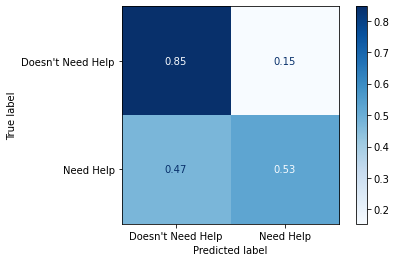

In [122]:
plot_confusion_matrix(cb, X_test, y_test, normalize = 'true', include_values=True, display_labels = ["Doesn't Need Help","Need Help"], cmap=plt.cm.Blues)

### Evaluation

Our model has a recall of 0.53, which means out of all the students who need mental health help, 53% will be caught by our model, 47% will fall through the crack.

Even though this is not great, it is still way better than not doing anything.

## Conclusions

Both our logistic regression and decision tree model indicates that whether a student is bullied in school is the biggest indicator of whether they would need help with anxiety and depression. The other important factors are whether they are harrassed or discriminated against in school and how satisfied they are with the program. 

It's very hard for students to voice their concerns in school because in a lot of cases their bully is their supervisor. By having a model to analyze survey data instead of humans, students can speak their truth without fear of retaliation and still get the help they need.

According to Stanford's [statistics](https://irds.stanford.edu/data-findings/doctoral-degree-programs-enrollment-and-demographics), there are 4720 new PhD students enrolled in 2021. Even though our model's predictive power is limited, it's going to be able to pick out 53% of the 37% of students who needs help with anxiety and depression, that's 926 students who gets the attention and care they need instead of suffering in silence. 